In [1]:
import pandas as pd

In [2]:
df=pd.read_csv('api_jsearch.csv')

In [3]:
df.shape

(299, 51)

In [4]:
df.head(1)

,job_id,employer_name,employer_logo,employer_website,employer_company_type,employer_linkedin,job_publisher,job_employment_type,job_title,job_apply_link,...,job_required_experience.experience_mentioned,job_required_experience.experience_preferred,job_required_education.postgraduate_degree,job_required_education.professional_certification,job_required_education.high_school,job_required_education.associates_degree,job_required_education.bachelors_degree,job_required_education.degree_mentioned,job_required_education.degree_preferred,job_required_education.professional_certification_mentioned
0,5Vw-5XA2IVM_vdWdAAAAAA==,Alvarez and Marsal,https://encrypted-tbn0.gstatic.com/images?q=tb...,http://www.alvarezandmarsal.com,Consulting,NaN,Alvarez & Marsal Careers,FULLTIME,"Analyst, Data Analytics - Transaction Services",https://careers.alvarezandmarsal.com/jobs/1504...,...,True,True,False,False,False,False,False,False,False,False


In [5]:
# checking Null value - specially from 'employer_company_type' column. If the column is not fill the other columns is not not fill for the rest of each row
(df['employer_company_type'].isna().sum()/len(df['employer_company_type']))*100

51.50501672240802

In [6]:
# select rows were the column "employer_company_type" is filling 
df_emp = df[(df["employer_company_type"].isna()==False)]

In [7]:
df_emp.info()

<class 'pandas.core.frame.DataFrame'>
Index: 145 entries, 0 to 296
Data columns (total 51 columns):
 #   Column                                                       Non-Null Count  Dtype  
---  ------                                                       --------------  -----  
 0   job_id                                                       145 non-null    object 
 1   employer_name                                                145 non-null    object 
 2   employer_logo                                                145 non-null    object 
 3   employer_website                                             145 non-null    object 
 4   employer_company_type                                        145 non-null    object 
 5   employer_linkedin                                            0 non-null      float64
 6   job_publisher                                                145 non-null    object 
 7   job_employment_type                                          145 non-null    object 


In [8]:
# Null Values in these columns, we can drop it
df_emp.drop(['employer_logo', 'employer_website','job_latitude', 'job_longitude', 'job_google_link','job_offer_expiration_datetime_utc', 
             'job_offer_expiration_timestamp','job_benefits','job_required_skills','employer_linkedin',
             'job_salary_currency','job_salary_period'], axis=1, inplace=True)

C:\Users\HP\AppData\Local\Temp\ipykernel_22984\3089315812.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_emp.drop(['employer_logo', 'employer_website','job_latitude', 'job_longitude', 'job_google_link','job_offer_expiration_datetime_utc',


In [9]:
df_emp.shape

(145, 39)

### Jobs offers by type of compagnies
top 5 companies recruiting 

In [16]:
compagany_type=round((df_emp['employer_company_type'].value_counts()/len(df_emp['employer_company_type'])*100),0)
top5_compagny_type= compagany_type.head(5).reset_index()
top5_compagny_type

,employer_company_type,count
0,Finance,25.0
1,Information,15.0
2,Consulting,12.0
3,Computer Services,10.0
4,Advertising,10.0


<Axes: xlabel='count', ylabel='employer_company_type'>

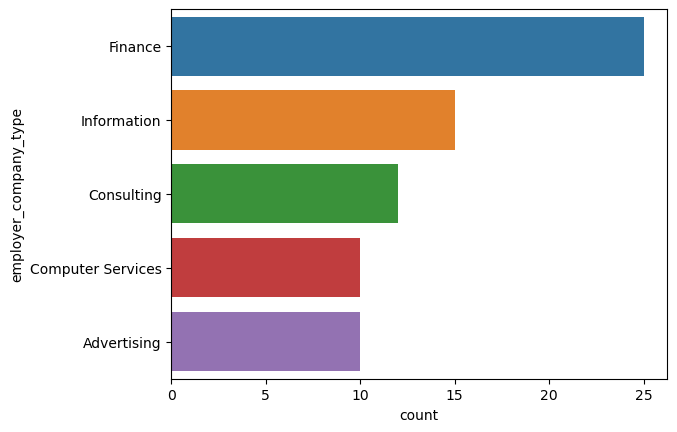

In [31]:
import matplotlib.pyplot as plt 
import seaborn as sns
sns.barplot(x='count', y='employer_company_type', data=top5_compagny_type)

In [19]:
job_employment_type= df_emp[['job_employment_type']].value_counts()
job_employment_type

job_employment_type
FULLTIME               113
INTERN                  20
PARTTIME                 9
CONTRACTOR               3
Name: count, dtype: int64

### jobs search by localisation
jobs offers focus on idf principaly in PARIS

In [20]:
def city_replace(job_city):
    if job_city in  ['Paris','Puteaux','Issy-les-Moulineaux','Bagneux','Nanterre','Gif-sur-Yvette','Saint-Michel-sur-Orge',
                     'Vélizy-Villacoublay','Montereau-sur-le-Jard','Aubervilliers','Courbevoie','Châtillon','Orsay','Rueil-Malmaison',
                    'Versailles','Malakoff','Trappes','Suresnes','Neuilly-sur-Seine','Boulogne-Billancourt' ]:
        return 'IDF'
    else:
        return job_city

In [21]:
df_emp['city_maps']= df_emp['job_city'].apply(city_replace)

C:\Users\HP\AppData\Local\Temp\ipykernel_22984\1090248538.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_emp['city_maps']= df_emp['job_city'].apply(city_replace)


In [22]:
city_jobs= df_emp[['job_country','city_maps']].value_counts()
city_jobs

job_country  city_maps              
FR           IDF                        37
ES           Barcelona                  24
             Madrid                     20
PT           Lisboa                     17
             Porto Salvo                 3
FR           Le Nouvion-en-Thiérache     3
PT           Porto                       2
             Carnaxide                   2
FR           Montpellier                 2
BG           София                       2
ES           València                    2
             Pozuelo de Alarcón          2
             Murcia                      2
             Getafe                      2
             Badalona                    1
             Tarragona                   1
NL           Amsterdam                   1
PT           Braga                       1
ES           Málaga                      1
             Vic                         1
Name: count, dtype: int64

In [111]:
df_emp.head(1)

,job_id,employer_name,employer_company_type,job_publisher,job_employment_type,job_title,job_apply_link,job_apply_is_direct,job_apply_quality_score,apply_options,...,job_required_experience.experience_preferred,job_required_education.postgraduate_degree,job_required_education.professional_certification,job_required_education.high_school,job_required_education.associates_degree,job_required_education.bachelors_degree,job_required_education.degree_mentioned,job_required_education.degree_preferred,job_required_education.professional_certification_mentioned,city_maps
0,5Vw-5XA2IVM_vdWdAAAAAA==,Alvarez and Marsal,Consulting,Alvarez & Marsal Careers,FULLTIME,"Analyst, Data Analytics - Transaction Services",https://careers.alvarezandmarsal.com/jobs/1504...,False,0.8623,"[{'publisher': 'Alvarez & Marsal Careers', 'ap...",...,True,False,False,False,False,False,False,False,False,IDF


In [108]:
df_emp['job_required_experience.required_experience_in_months'].isna().sum()

111

In [110]:
required_experience_in_months= round((df_emp['job_required_experience.required_experience_in_months'].value_counts()
                                     /df_emp['job_required_experience.required_experience_in_months'].count()*100),1)
required_experience_in_months

job_required_experience.required_experience_in_months
36.0     38.2
60.0     32.4
12.0      8.8
120.0     5.9
24.0      5.9
48.0      2.9
84.0      2.9
360.0     2.9
Name: count, dtype: float64